# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np
import seaborn

warnings.filterwarnings("ignore")  # В какой-то момент, один алгоритм выдавал предупреждения, отключил их.

pd.set_option('display.max_columns', None) # Для видимости всех колонок.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True) # Переименовываю столбец в правильный вид.
print()

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


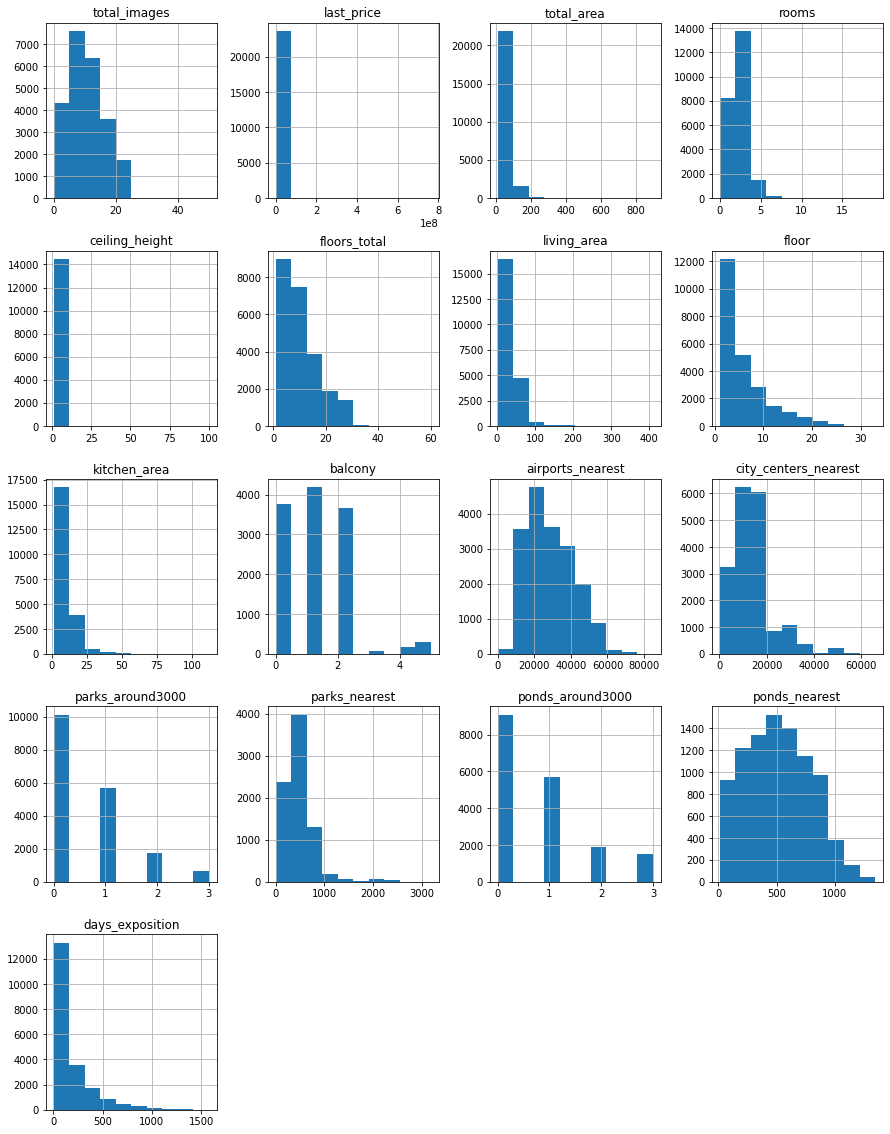

In [6]:
data.hist(figsize=(15, 20))
print()

**Датасет состоит из 23 тычяч строк и 22 столбцов.**

**Обнаружены ошибки:**
* В типах данных.
* Название одного столбца (исправлен)
* Множественные пропуски значений в разных столбцах.
* По гистограммам видны множество аномалий.

### Предобработка данных

#### Определяем пропущенные значения.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Пояснение пропусков.
* ceiling_height - Высота потолков, очень часто не указывают в объявлении.
* floors_total - Количество этажей в здании, практически всегда указано.
* living_area - Жилая площадь, может отсутствовать в связи с тем что помещение является апартаментом.
* is_apartment - Значение по большей части указывают когда помещение является апартаментом, в иных случаях пропускают.
* kitchen_area - Площадь кухни, может отсутствовать в связи с тем что помещение является апартаментом.
* balcony - Балконы, в случаях если балкона нет то часто отсутствует само значение.
* locality_name - Наименования места, явная ошибка, так-как цена имеет большую корреляцию от локации, строки будут удалены.
* airports_nearest - Расстояние до близжайшего аэропорта в метрах.
* days_exposition - Количество дней сколько висело объявление.
* Расстояния до аэропортов, центра города, прудов, и их количества в метрах, значения могут отсутствовать в связи с слишком большим расстоянием.

In [8]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
city_centers_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


**В целом всё хорошо, так-как многие отсутствующие значения либо исправимы, либо не критично сужают датасет.**

#### Заполняем пропущенные значения.

In [9]:
# Локация очень важна в оценке квартиры, их всего 49, поэтому выбрасываем строки без локации.
print('Пропущенных значений локаций:', data['locality_name'].isna().sum())
data = data.dropna(subset=['locality_name'])

# Выносим пропуски из этажности дома, их всего 85, а они не дают изменить тип с float на int,
# что в конечном итоге может помешать исследованию если понадобиться разбить этажность на группы.
print('Пропущенных значений этажности:', data['floors_total'].isna().sum())
data = data.dropna(subset=['floors_total'])

# Заполняем пропуски в апартаментах нулевыми значениями.
data['is_apartment'] = data['is_apartment'].fillna(0)

# Пропуски в балконах заменяем нолями
data['balcony'] = data['balcony'].fillna(0)

Пропущенных значений локаций: 49
Пропущенных значений этажности: 85


**Остальные пропуски не трогаем, так-как их заполнение медианнами или дроп может негативно повлиять на данные.**

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Здесь все корректно, но is_apartment я бы предложил заполнить False, что бы лишний раз не фильтровать числовую заглушку при работе.
</div>

#### Изменяем тип данных.

In [10]:
# Цену помещения из float в int.
data['last_price'] = data['last_price'].astype(int)

# Этажность здания из float в int.
data['floors_total'] = data['floors_total'].astype(int)

# Балконы из float в int.
data['balcony'] = data['balcony'].astype(int)

# Дата публикации из object в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

# Апартаменты из float в булев массив.
data['is_apartment'] = data['is_apartment'].astype(bool)

* Цену в подсчётах лучше использовать в целочисленном типе данных.
* Этажность здания может быть только натуральным числом, потому в int.
* Количество балконов может быть только натуральным числом.
* Дату публикации в datetime, удобнее использовать в рассчётах.
* Апартаментами помещение либо является либо нет, соотв. булев массив.

#### Устранение неявных дубликатов в названиях локаций.

In [11]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
name = []
for i in data['locality_name'].unique():  # Проходим по уникальным значениям столбца.     
    
    cicle_name = []        # Пустой список для цикла наименований.
    
    for j in i.split():    # Проходим по частям.
        for k in j:
            if k.isupper():    # У каждой части проверям первую букву на верхний регистр.
                cicle_name.append(j)  # Если первая буква большая добавляем в список cicle_name.
    
    x = ' '.join(cicle_name)   # Соеденяем части.
    if x not in name:      # Если наименование нет в списке name, добавляем его.
        if x != 'Бор':     # В общем я не до конца понял как 'деревня Бор' ломает систему. :/
            name.append(x) # А это значит то что алгоритм работает не так как хотелось, по хорошему дебаггером его потыкать,
                           # но я и так вожусь с этим циклом слишком долго, в принципе повреждений вроде как нет.
                           
                           # Дело в том что если пропустить деревню Бор, как 'Бор' то исчезают Зелёный Бор, Пансионат Бор итд.
                           # В общем 'деревня Бор' пожирает примерно тройку других Боров. Пришлось отфильтровать.                

for i in data['locality_name'].unique():  
    for j in name:                        # Проверяем столбец на вхождение очищенных наименований.
        if j in i:                        # В случае совпадения наименований, заменяем на чистое наименование. 
            data['locality_name'] = data['locality_name'].replace(i, j)       

In [13]:
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

295


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Устранение аномальных значений.

Количество значений высоты потолков выше 4м: 75



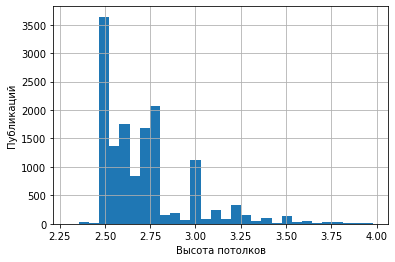

In [14]:
# Выносим аномальные значения высоты потолков.

print('Количество значений высоты потолков выше 4м:', len(data.query('ceiling_height > 4')))
# Только под конец сообразил как правильно писать эти условия через query.
data = data.query('ceiling_height > 20 / 10 or ceiling_height.isna()') # Значения выше 20 метров делим на 10.
data = data[(data['ceiling_height'].isna()) | (data['ceiling_height'] < 4) & (data['ceiling_height'] > 2.25)]
data['ceiling_height'].hist(bins=30)
plt.xlabel('Высота потолков')
plt.ylabel('Публикаций')
print()

Количество цен выше 20млн/р -  677
Количество цен ниже 100 тыс/р -  1



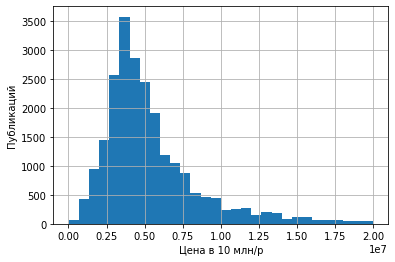

In [15]:
# Удаляем выбивающееся значения из last_price.
print('Количество цен выше 20млн/р - ', len(data.query('last_price > 20000000')))
print('Количество цен ниже 100 тыс/р - ', len(data.query('last_price < 100000')))
data = data.query('last_price < 20000000' or 'last_price > 100000')
data['last_price'].hist(bins=30)
plt.xlabel('Цена в 10 млн/р')
plt.ylabel('Публикаций')
print()

**677 строк это конечно очень много, но слишком уж длинный ус получается, потому барбершопим.**

30
191



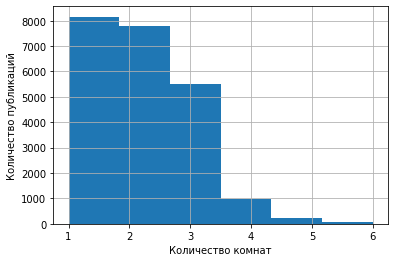

In [16]:
print(len(data.query('rooms > 6')))
print(len(data.query('rooms < 1'))) # Присутствуют значения с нулём комнат, меняем на 1.
data = data.query('rooms <= 6')
data['rooms'] = data['rooms'].replace(0, 1)
data['rooms'] = data['rooms'].round()
data['rooms'].hist(bins=6)
plt.xlabel('Количество комнат')
plt.ylabel('Количество публикаций')
print()

30



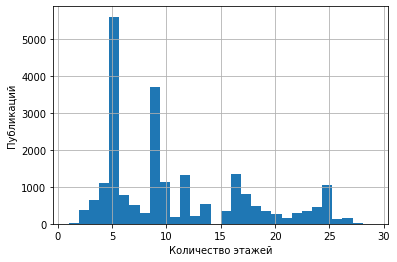

In [17]:
print(len(data.query('floors_total > 30'))) # Подрезаем этажи.
data = data.query('floors_total <= 30')
data['floors_total'].hist(bins=30)
plt.xlabel('Количество этажей')
plt.ylabel('Публикаций')
print()

161



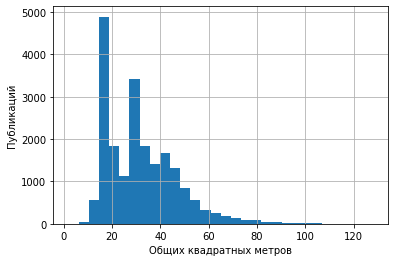

In [18]:
print(len(data.query('total_area > 150'))) # Подрезаем общую площадь, опять же очень длинный ус, вплоть до 800кв.м., стрежём.
data = data.query('total_area <= 150')
data['living_area'].hist(bins=30)
plt.xlabel('Общих квадратных метров')
plt.ylabel('Публикаций')
print()

21
1744



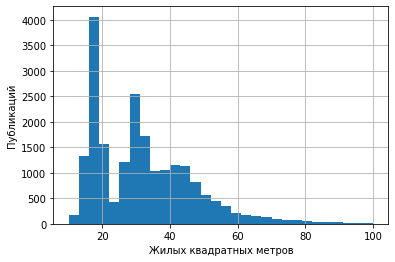

In [19]:
print(len(data.query('living_area > 100')))
print(len(data.query('living_area.isna()')))
# Слишком много строк na, потому оставляем их. К тому же это скорее всего просто аппартаменты.
data = data[(data['living_area'].isna()) | (data['living_area'] <= 100) & (data['living_area'] >= 10)]
data['living_area'].hist(bins=30)
plt.xlabel('Жилых квадратных метров')
plt.ylabel('Публикаций')
print()

41



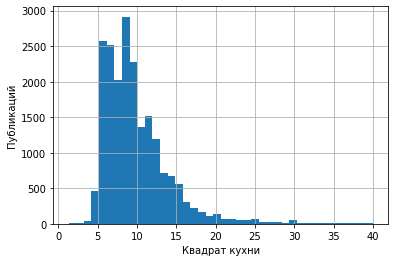

In [20]:
print(len(data.query('kitchen_area > 40'))) # Отрезаем усище жертвуя всего 41 строкой.
data = data[(data['kitchen_area'].isna()) | (data['kitchen_area'] <= 40)]
data['kitchen_area'].hist(bins=40)
plt.xlabel('Квадрат кухни')
plt.ylabel('Публикаций')
print()

45



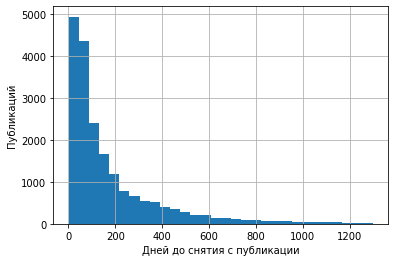

In [21]:
print(len(data.query('days_exposition > 1300'))) 
# Даже 1300 дней можно считать устаревшими данными, впрочем будет интересно посмотреть на тенденции в целом.
data = data[(data['days_exposition'].isna()) | (data['days_exposition'] <= 1300)]
data['days_exposition'].hist(bins=30)
plt.xlabel('Дней до снятия с публикации')
plt.ylabel('Публикаций')
print()

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8740
floors_total                0
living_area              1737
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2095
balcony                     0
locality_name               0
airports_nearest         5455
city_centers_nearest     5438
parks_around3000         5437
parks_nearest           15107
ponds_around3000         5437
ponds_nearest           14139
days_exposition          2867
dtype: int64

**Значения высоты потолков слишком часто не указаны, оставляем, нежилыми площадями могут быть аппартаменты, с тем же аргументом к площади кухни, расстояния до объектов вероятно просто не всегда указаны.**

In [58]:
duplicateRows = data[data.duplicated ()] # Проверка на дубликаты.
duplicateRows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday_exposition,month_exposition,year_exposition,floor_type,days


### Добавление новых столбцов.

#### Цена одного квадратного метра.

In [23]:
data['square_price'] = data['last_price'] / data['total_area']

#### День недели, месяц, год публикации.

In [24]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры первый, последний, другой.

In [25]:
data['floor_type'] = data['floor'] - data['floors_total']
data['floor_type'].astype(object)
data.loc[(data['floor_type'] != 0) & (data['floor'] != 1), 'floor_type'] = 'Другой' 
data.loc[data['floor_type'] == 0, 'floor_type'] = 'Последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'Первый'

#### Расстояния до аэропорта и центра города из метров в километры.

In [26]:
data['airports_nearest'] = (data['airports_nearest'] / 1000).round()

### Исследовательский анализ данных

#### Общая площадь.

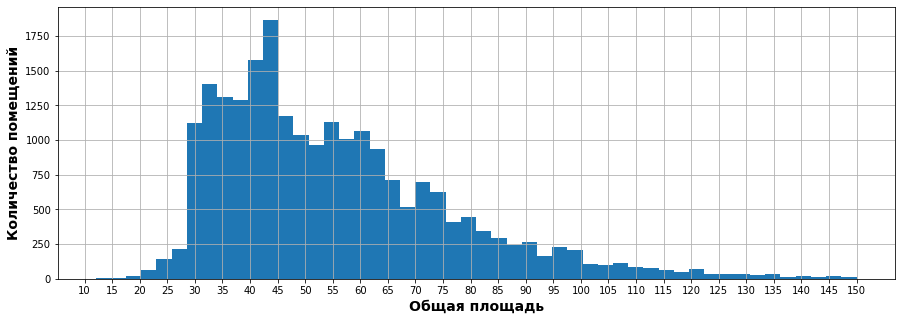

In [27]:
total_area_hist = data['total_area'].hist(bins=50, figsize=(15, 5))
total_area_hist.set_xlabel('Общая площадь', fontsize=14, fontweight='bold')
total_area_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
total_area_hist.set_xticks(np.arange(10,155,5))
print()

*Основная масса квартир находиться в пределах 30-65кв/м, далее при увелечении общей площади наблюдается относительно плавное уменьшение количества помещений относительно общей площади.*

#### Жилая площадь.

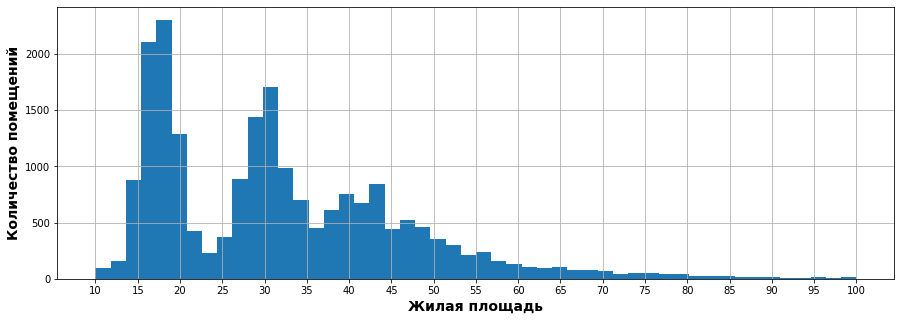

In [28]:
living_area_hist = data['living_area'].hist(bins=50, figsize=(15, 5))
living_area_hist.set_xlabel('Жилая площадь', fontsize=14, fontweight='bold')
living_area_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
living_area_hist.set_xticks(np.arange(10,105,5))
print()

*Были обнаружены два локальных минимума, между 20-25кв/м, и в районе 35кв/м, скорее всего связаны с переходом помещений с одной комнатой в двукомнатные и трёхкомнатные помещения.*

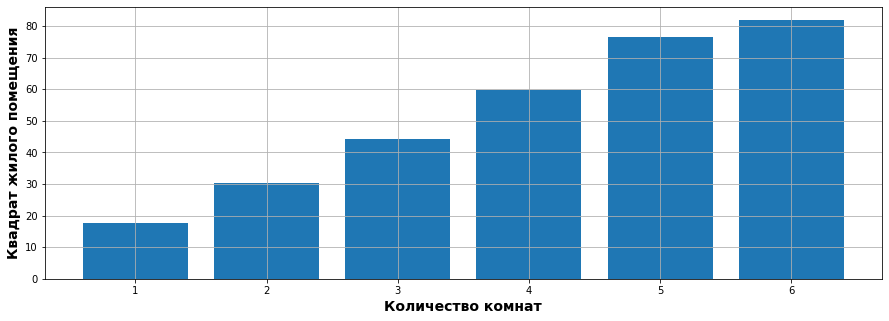

In [29]:
# Что-бы проверить гипотезу берём медианную жилого квадрата относительно количества комнат, и соотносим значения с количеством
# комнат.
living_square_median = []
rooms_count = []

for i in sorted(data['rooms'].unique()):
    if i != 3:
        living_square_median.append(data.groupby('rooms')['living_area'].transform(lambda x: x.median()).where(data['rooms'] == i).unique()[1])
    elif i == 3:
        living_square_median.append(data.groupby('rooms')['living_area'].transform(lambda x: x.median()).where(data['rooms'] == i).unique()[0])
    rooms_count.append(i)
# Не понятно почему - когда i равно 3, то получается массив отличающейся по структуре от остальных массивов.
# Пришлось добавить условие, есть вариант пробежать по списку isnumeric итд, но это лишь отнимет время.
# Потом понял что вроде как можно было и без лямбды, но при попытке переделать всё ломается.))

plt.figure(figsize=(15, 5))
plt.xlabel('Количество комнат', fontsize=14, fontweight='bold')
plt.ylabel('Квадрат жилого помещения', fontsize=14, fontweight='bold')
plt.bar(rooms_count, living_square_median)
plt.grid(True)
plt.show()
# Подозреваю что это ещё как-то связанно со СНИПами.
# Изучать их в данный момент я конечно же не буду т.к. это займёт уйму времени, проект всё таки учебный, 
# да и влияние на результат не критичное.

*На данном графике видны резкие скачки квадрата жилого помещения в зависимости от количества комнат что в свою очередь и обуславливает неравномерное снижение количества помещений относительно увелечения квадрата помещения.*

#### площадь кухни.

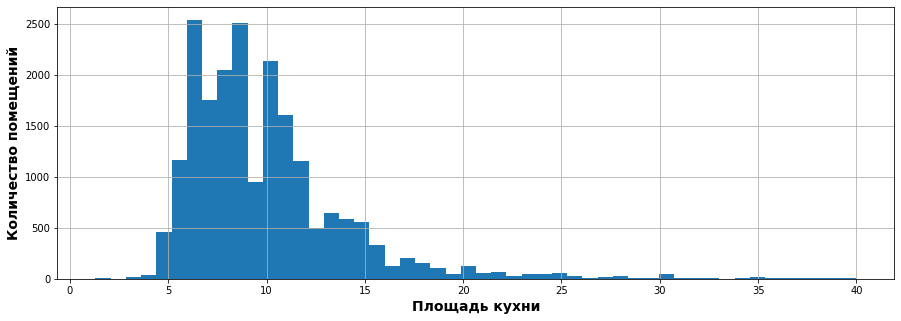

In [30]:
kitchen_area_hist = data['kitchen_area'].hist(bins=50, figsize=(15, 5))
kitchen_area_hist.set_xlabel('Площадь кухни', fontsize=14, fontweight='bold')
kitchen_area_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
print()

*Опять наблюдаем скачки количества помщений в зависимости от увелечния площади, обусловленные количеством комнат в помещении.*

#### Цена объекта.

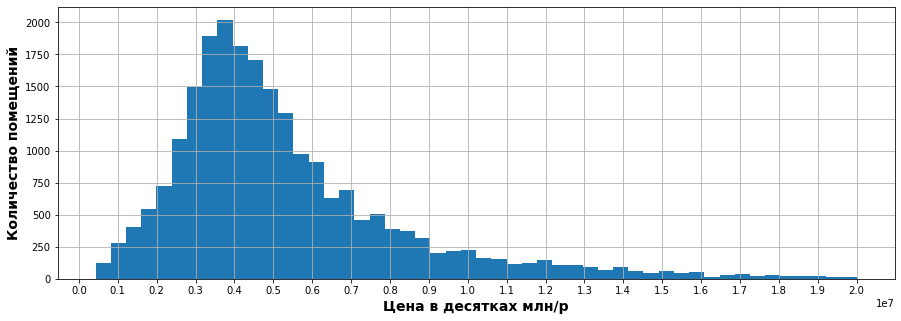

In [31]:
last_price_hist = data['last_price'].hist(bins=50, figsize=(15, 5))
last_price_hist.set_xlabel('Цена в десятках млн/р', fontsize=14, fontweight='bold')
last_price_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
last_price_hist.set_xticks(np.arange(0,21000000, 1000000))
# Задаю что-бы показывал сетку по миллиону, не реагирует, зачем-то делит результат на 10.
# За-то если по 100к сделать то график рад стараться только там ничего не видно.
print()

*Основная масса помещений находится в пределах от 2 до 7 миллионов рублей. Далее наблюдается плавный спад количества помещений.*

#### Количество комнат.

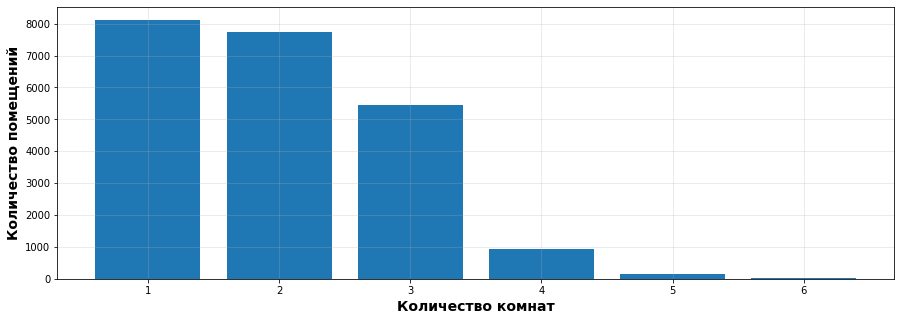

In [32]:
rooms_count = sorted(data['rooms'].unique())
realty_numb = data.groupby('rooms')['rooms'].count()
# Подобные структуры могут выдать неверный результат, 
# поэтому значения сравнивал с hist, и табличными данными, график верен.


plt.figure(figsize=(15, 5))
plt.xlabel('Количество комнат', fontsize=14, fontweight='bold')
plt.ylabel('Количество помещений', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.bar(rooms_count, realty_numb)
plt.show()

*Основная масса помещений находится в пределах от 1 до 3 комнат включительно.*

#### Высота потолков.

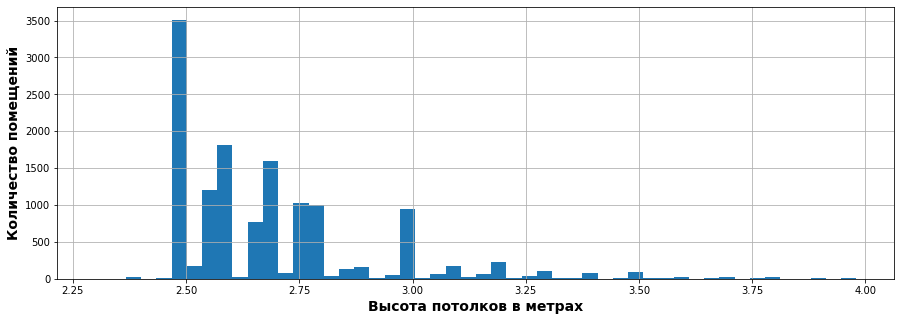

In [33]:
ceiling_height_hist = data['ceiling_height'].hist(bins=50, figsize=(15, 5))
ceiling_height_hist.set_xlabel('Высота потолков в метрах', fontsize=14, fontweight='bold')
ceiling_height_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
print()

*Основная масса помещений имеет высоту потолков от 2.4 до 3 метров. Скачки можно обусловить типом зданий(Хрущёвки, Сталинки итд.)*

*Также стоит добавить что более чем у трети помещений высота потолков не указана*

#### Этаж квартиры.

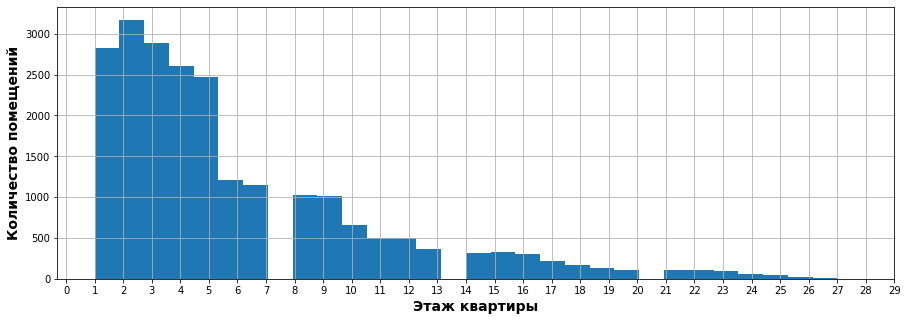

In [34]:
floor_hist = data['floor'].hist(bins=30, figsize=(15, 5))
floor_hist.set_xlabel('Этаж квартиры', fontsize=14, fontweight='bold')
floor_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
floor_hist.set_xticks(np.arange(0,30, 1))
print()

*Основная масса помещений расположилась на 1-5 этажах здания, далее скачок с относительно плавным убыванием этажности в зависимости от количества помещений. Скачок можно обусловить многочисленностью зданий высотой в 5 этажей.*

#### Тип этажа квартиры («первый», «последний», «другой»).

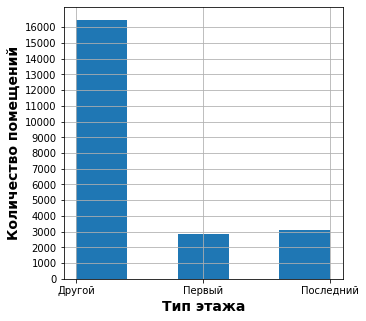

In [35]:
floor_type_hist = data['floor_type'].hist(bins=5, figsize=(5, 5))
floor_type_hist.set_xlabel('Тип этажа', fontsize=14, fontweight='bold')
floor_type_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
floor_type_hist.set_yticks(np.arange(0,17000, 1000))
print()

*Немногим больше чем 16000 помещений, состоят в типе этажа 'Другой'* 

*Этажей 'Первый' и 'Последний' примерно поровну и состоявляют по 3000 помещений.*

#### Общее количество этажей в доме.

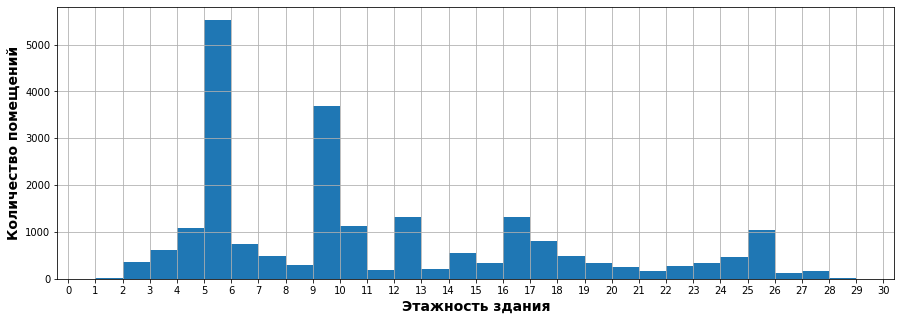

In [36]:
floors_total_hist = data['floors_total'].hist(bins=28, figsize=(15, 5))
floors_total_hist.set_xlabel('Этажность здания', fontsize=14, fontweight='bold')
floors_total_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
floors_total_hist.set_xticks(np.arange(0, 31, 1))
print()

*По графику видно что по большей части мы имеем дело с 5 и 9евяти этажными зданиями.*

#### Расстояние до центра города в метрах.

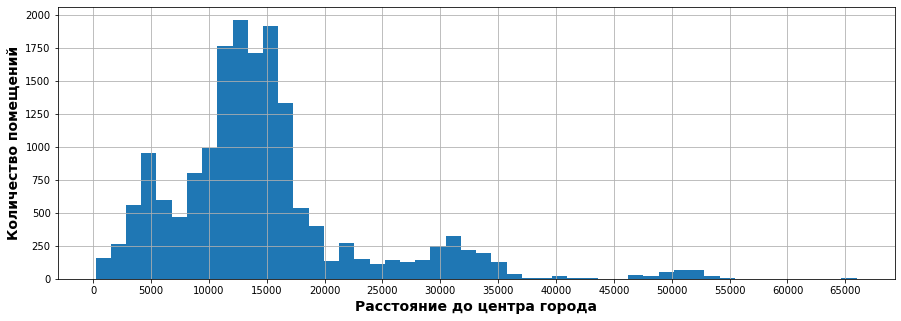

In [60]:
city_centers_nearest_hist = data['city_centers_nearest'].hist(bins=50, figsize=(15, 5))
city_centers_nearest_hist.set_xlabel('Расстояние до центра города', fontsize=14, fontweight='bold')
city_centers_nearest_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
city_centers_nearest_hist.set_xticks(np.arange(0, 70000, 5000))
print()

In [38]:
(data['locality_name'] == 'Санкт-Петербург').sum()

14575

*По графику видно что преобладающее большинство, примерно две-трети, помещений находится в черте города Санкт-Петербург.*

*П.С. Протяженность Санкт-Петербурга с севера на юг 44 км, с запада на восток 25 км.*

#### расстояние до ближайшего аэропорта

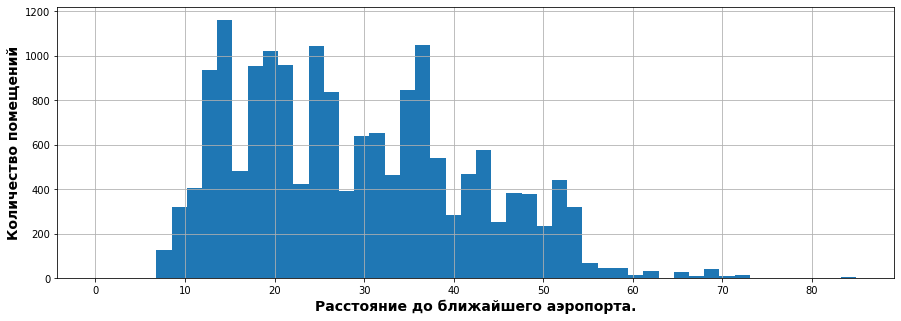

In [39]:
airports_nearest_hist = data['airports_nearest'].hist(bins=50, figsize=(15, 5))
airports_nearest_hist.set_xlabel('Расстояние до ближайшего аэропорта.', fontsize=14, fontweight='bold')
airports_nearest_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
airports_nearest_hist.set_xticks(np.arange(0, 90, 10))
print()

*Большинство помещений находится в передлах от 10 до 40км от ближайшего аэропорта*

*Также видны скачки расстояний, вероятно связанных со спецификой застройки города.*

#### расстояние до ближайшего парка

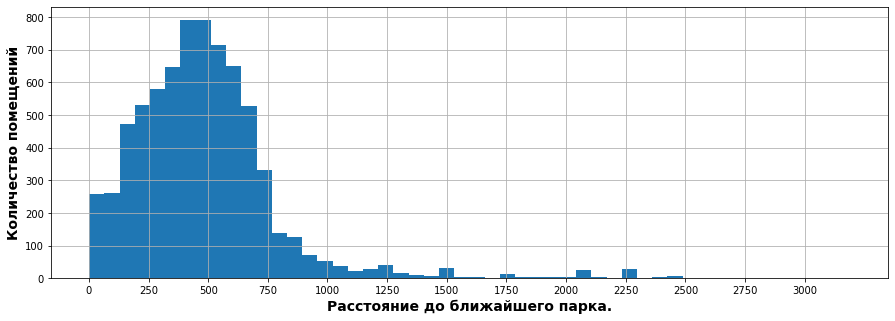

In [40]:
parks_nearest_hist = data['parks_nearest'].hist(bins=50, figsize=(15, 5))
parks_nearest_hist.set_xlabel('Расстояние до ближайшего парка.', fontsize=14, fontweight='bold')
parks_nearest_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
parks_nearest_hist.set_xticks(np.arange(0, 3250, 250))
print()

*Большинство помещений находится в пределах от 0 до 750 метров до ближайшего парка.*

#### Дата публикации объявления.

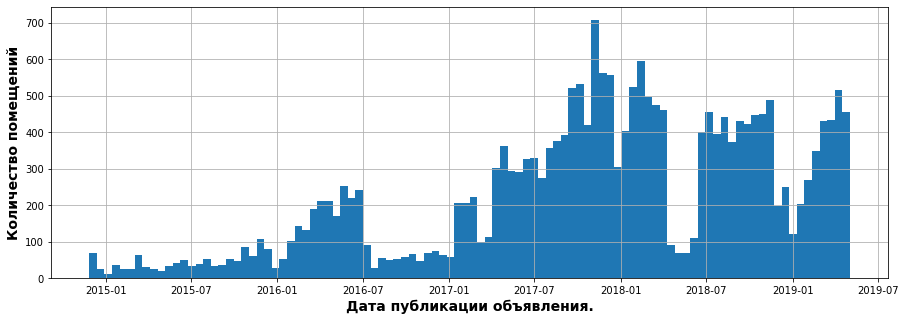

In [41]:
# В задании указано что надо изучить  месяц, но я считаю это ошибкой,
# так как в разные года на публикации в определённые месяцы имели значительное влияние изменения в законах о недвижимости,
# что в свою очередь очень сильно исказит вывод о том в какие месяцы продаётся больше а в какие меньше.

first_day_exposition_hist = data['first_day_exposition'].hist(bins=100, figsize=(15, 5))
first_day_exposition_hist.set_xlabel('Дата публикации объявления.', fontsize=14, fontweight='bold')
first_day_exposition_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
print()

*Основная масса публикаций находится в пределах от января 2017 года, по апрель 2019 года.*

*Отрицательный скачок на графике в период второго полугодия 2016 года связан с падением цен на недвижимость*

*Также спад публикаций в начале второго полугодия 2018 года, в то время произошла отмена долевого строительства, не все понимали как именно отреагирует рынок и большинство попросту заняло выжидательную позицию что в свою очередь и отражено на нашем графике.*

*Опять же с начала 2019года вступали в силу некоторые изменения правил в области недвижимости.*

*7 июня 2018 года президент РФ Владимир Путин в ходе "Прямой линии" дал правительству указание выйти на цивилизованные способы строительства жилья, без долевого участия. По его словам, с 1 июля 2019 года решено прекратить заключение долевых договоров.*

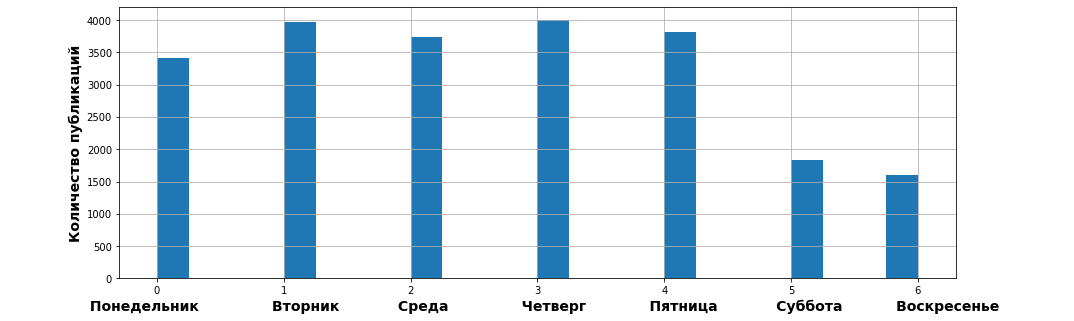

In [42]:
data['days'] = data['weekday_exposition']
day_exposition_hist = data['days'].hist(bins=24, figsize=(15, 5))
day_exposition_hist.set_xlabel('                 Понедельник               Вторник            Среда               Четверг             Пятница            Суббота           Воскресенье              ', 
                               fontsize=14, fontweight='bold')
day_exposition_hist.set_ylabel('Количество публикаций', fontsize=14, fontweight='bold')
print()

Картинка не подгружается, в общем аналогично что к графику)) \
https://yandex.ru/images/search?img_url=https%3A%2F%2Fsun9-24.userapi.com%2Fimpf%2Fc845522%2Fv845522541%2F1c59ac%2Fawc7fQEj7lg.jpg%3Fsize%3D604x390%26quality%3D96%26sign%3D32841eb645a47ef118d3bc1481b4e5e3%26type%3Dalbum&lr=10733&pos=4&rpt=simage&source=serp&text=и%20так%20сойдёт

*В буднии дни публикаций больше чем в выходные.*

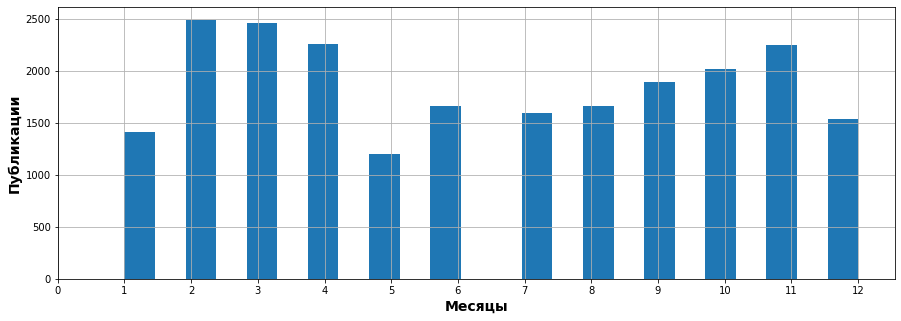

In [66]:
month_exposition_hist = data['month_exposition'].hist(bins=24, figsize=(15, 5))
month_exposition_hist.set_xlabel('Месяцы', fontsize=14, fontweight='bold')
month_exposition_hist.set_ylabel('Публикации', fontsize=14, fontweight='bold')
month_exposition_hist.set_xticks(np.arange(0, 13, 1))
print()

**Из всех месяцев по которым можно рассудить что продажи ниже это май, декабрь, и явнварь**
****

### Скорость продажи помещений.

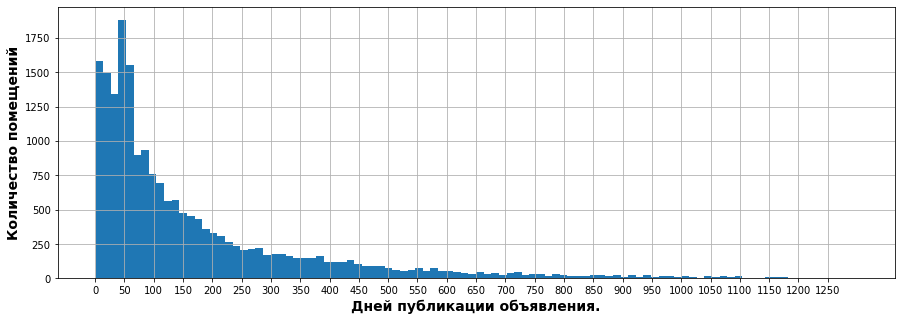

In [43]:
days_exposition_hist = data['days_exposition'].hist(bins=100, figsize=(15, 5))
days_exposition_hist.set_xlabel('Дней публикации объявления.', fontsize=14, fontweight='bold')
days_exposition_hist.set_ylabel('Количество помещений', fontsize=14, fontweight='bold')
days_exposition_hist.set_xticks(np.arange(0, 1300, 50))
print()

In [44]:
print(data['days_exposition'].mean(), data['days_exposition'].median()) # Смотрис среднюю и медианную.

173.8159700880967 92.0


*В среднем продажа помещения занимает в районе 173 дней, медианное значение равно 92 дням.*

*Быстрыми продажами можно считать помещения проданные в первые два месяца.* \
*Необычно долгими продажами можно считать помещения снятые с публикации после 500 дней с начала публикации.*

<AxesSubplot:>

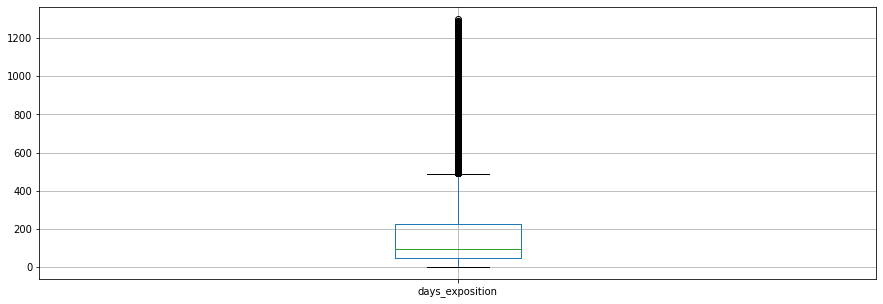

In [77]:
data.boxplot(column=['days_exposition'], figsize=(15,5))

In [71]:
data['days_exposition'].describe()

count    19524.00000
mean       173.81597
std        207.74861
min          1.00000
25%         44.00000
50%         92.00000
75%        222.00000
max       1299.00000
Name: days_exposition, dtype: float64

### Факторы влияющие на стоимость объекта.

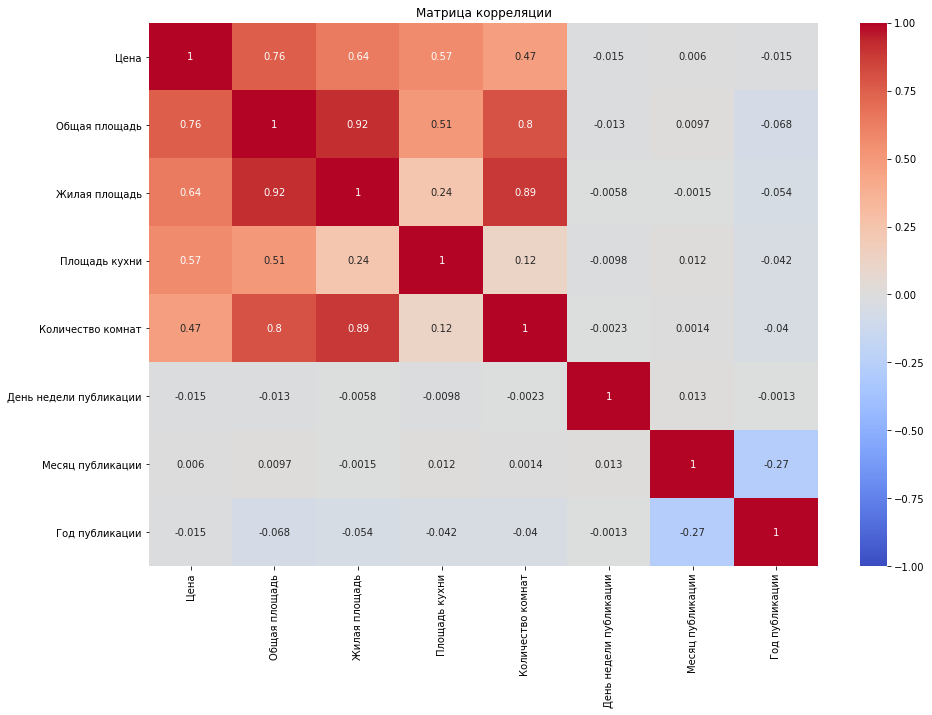

In [45]:
corr_list = [
    'last_price',
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'rooms',  
    'weekday_exposition', 
    'month_exposition', 
    'year_exposition',
]

corr_labels = [
    'Цена',
    'Общая площадь',
    'Жилая площадь', 
    'Площадь кухни', 
    'Количество комнат', 
    'День недели публикации', 
    'Месяц публикации', 
    'Год публикации',
]

matrix = data[corr_list].corr()

plt.figure(figsize = (15, 10))
seaborn.heatmap(matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

*День недели, месяц, год от цены не коррелируют.*

*Цена коррелирует от 4х параметров, общая площадь, жилая площадь, площадь кухни, количество комнат* \
*Далее построим графики относительно этих параметров*
*В матрице отсутствует параметр 'Типа этажа', его также рассмотрим на отдельном графике.*

#### Фактор общей площади.

Корреляция Пирсона: 0.757


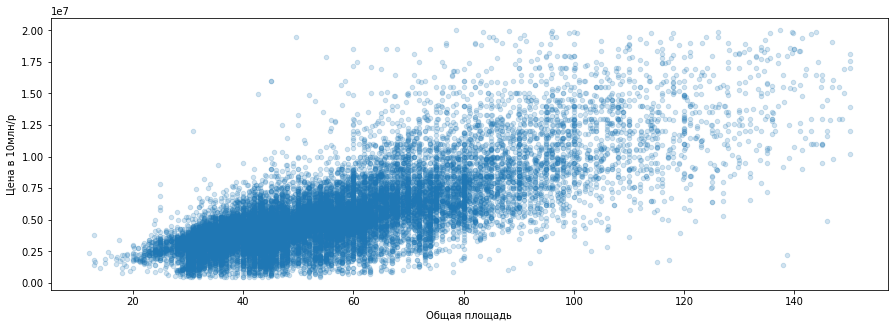

In [46]:
data.plot(x='total_area', y='last_price', figsize=(15, 5), style='.', kind='scatter', alpha=0.2,
         xlabel='Общая площадь', ylabel='Цена в 10млн/р')
print('Корреляция Пирсона:', round(data['total_area'].corr(data['last_price']), 3))

*Величина корреляции цены от общей площади - высокая.* \
*В среднем чем больше площадь тем выше цена*

#### Фактор жилой площади.

Корреляция Пирсона: 0.637


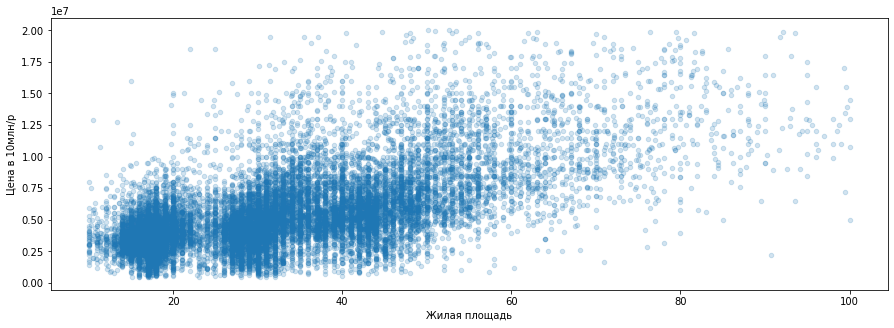

In [47]:
data.plot(x='living_area', y='last_price', figsize=(15, 5), style='.', kind='scatter', alpha=0.2,
         xlabel='Жилая площадь', ylabel='Цена в 10млн/р')
print('Корреляция Пирсона:', round(data['living_area'].corr(data['last_price']), 3))

*Величина корреляции цены от жилой площади - средняя.* \
*В среднем чем больше площадь тем выше цена*

#### Фактор площади кухни.

Корреляция Пирсона: 0.565


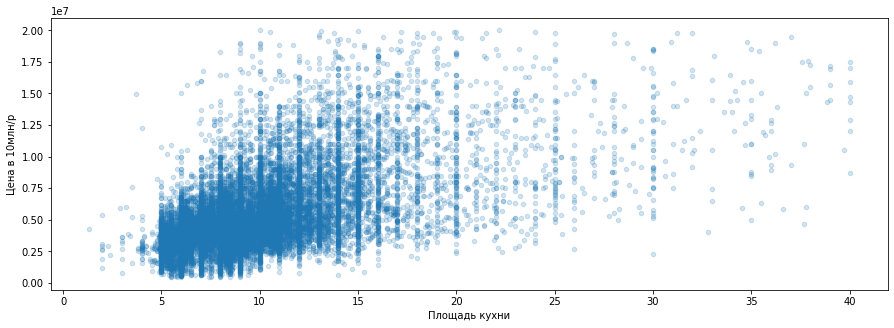

In [48]:
data.plot(x='kitchen_area', y='last_price', figsize=(15, 5), style='.', kind='scatter', alpha=0.2,
         xlabel='Площадь кухни', ylabel='Цена в 10млн/р')
print('Корреляция Пирсона:', round(data['kitchen_area'].corr(data['last_price']), 3))

*Величина корреляции цена от площади кухни - средняя.* \
*В среднем чем больше площадь тем выше цена.*

#### Фактор количества комнат.

Корреляция Пирсона: 0.473


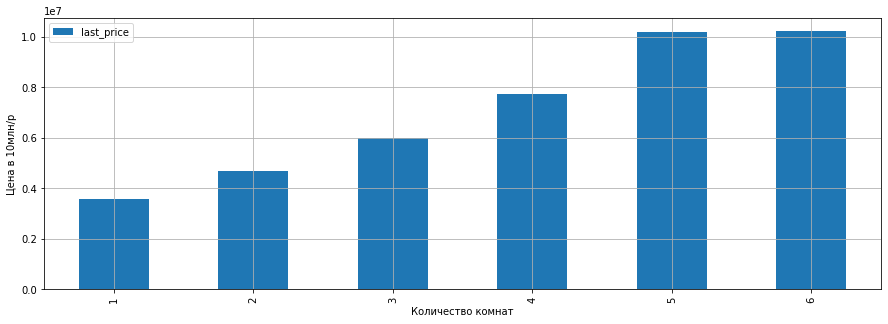

In [49]:
rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms.plot(figsize=(15, 5), xlabel='Количество комнат', ylabel='Цена в 10млн/р', kind='bar', grid=True)
print('Корреляция Пирсона:', round(data['rooms'].corr(data['last_price']), 3))

*Не смотря на тендецию - чем больше комнат тем дороже квартира, корреляция цены от количества комнат - слабая.*

#### Фактор типа этажа.

Корреляция Пирсона: -0.104


,Медианная цена
floor_type,
Другой,4700000
Первый,3850000
Последний,4150000


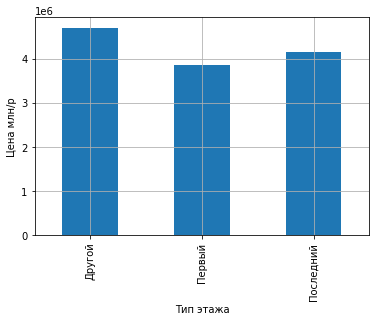

In [50]:
data_floor_price = data.groupby('floor_type')['last_price'].median()
data_floor_price.plot(kind='bar', xlabel='Тип этажа', ylabel='Цена млн/р', grid=True)

ftp = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
ftp.rename(columns = {'last_price': 'Медианная цена'}, inplace=True)

data2 = data.copy()      # Изменяю данные в численный тип для вычесления корреляции.
data2 = data2.replace('Другой', 0)
data2 = data2.replace('Первый', 1)
data2 = data2.replace('Последний', 2)
data2['floor_type'] = data2['floor_type'].astype(int)
print('Корреляция Пирсона:', round(data2['floor_type'].corr(data2['last_price']), 3))
ftp

*Корреляция цены от типа этажа отсутствует.* \
*Медианная же цена первого этажа в отличии от типа 'Другой' состовляет 850т.р., между ними расположились последние этажи с ценой в 4.15млн.р.*

### Цена одного квадратного метра в десятке населённых пунктах с наибольшим числом объявлений.

In [51]:
toploc = data.groupby('locality_name')['locality_name'].count() # Вычисляем количество объявлений относительно н.п.
toploc = pd.DataFrame({'name':toploc.index, 'count':toploc.values}) # Создаём отдельный дф.
toploc.sort_values('count', ascending=False, inplace=True)

# Далее вычясляем среднюю цену одного кв.м. относительно каждого н.п. создаём отдельный дф.
square_loc_price = (data.groupby('locality_name')['last_price'].sum() / data.groupby('locality_name')['total_area'].sum())
square_loc_price = pd.DataFrame({'name':square_loc_price.index, 'price':square_loc_price.values})

toploc = toploc.join(square_loc_price.set_index('name'), on='name') # Соеденяем два датафрейма.
toploc = toploc.head(10)
toploc.sort_values('price', inplace=True, ascending=False)
toploc['price'] = toploc['price'].astype(int)
toploc.head(10)

,name,count,price
215,Санкт-Петербург,14575,108620
195,Пушкин,351,102567
102,Кудрово,468,93865
164,Парголово,325,87629
142,Мурино,582,83363
281,Шушары,438,76290
86,Колпино,337,73842
41,Гатчина,304,68746
33,Всеволожск,392,66741
34,Выборг,231,57750


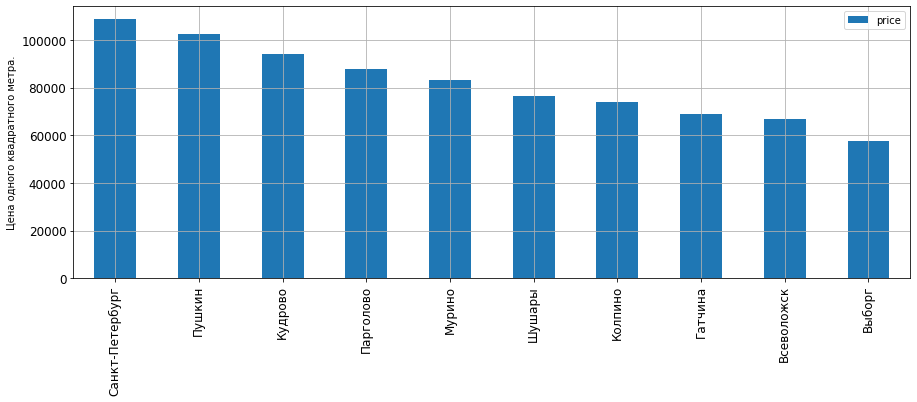

In [52]:
toploc.plot(kind='bar', x='name', y='price', figsize=(15,5), xlabel='', ylabel='Цена одного квадратного метра.',
           fontsize=12, grid=True)
print()

*Самая высокая цена квадратного мерта в Санкт-Петербурге и состовляет в среднем 108620т.р.* \
*Самая низкая цена квадратного мерта в Выборге, в среднем состовляет 57750т.р.*

### Зависимость цены кв/м, от расстояния до центра города.

Корреляция цены квадратного метра от расстояния: -0.33



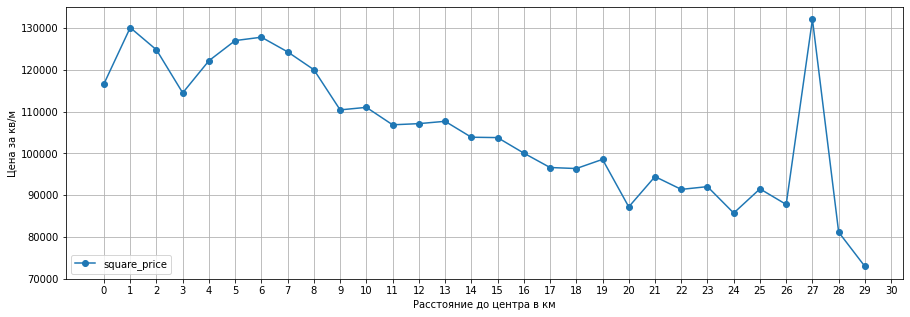

In [53]:
# Но тут то попроще будет.

price_km = data[data['locality_name'] == 'Санкт-Петербург']
print('Корреляция цены квадратного метра от расстояния:', 
      round(price_km['square_price'].corr(price_km['city_centers_nearest']), 3))

price_km['city_centers_nearest'] = round(price_km['city_centers_nearest'] / 1000) # С метров в километры, опять, подозрительно.
                                                                                  # Проверять я конечно же не буду.

price_km.pivot_table(index='city_centers_nearest', values='square_price').plot(figsize=(15,5), style='-o',
        xlabel='Расстояние до центра в км', ylabel='Цена за кв/м', grid=True)
plt.xticks(np.arange(0,31,1))
print()

*Корреляция цены от расстояния слабая но есть, чем дальше от центра тем дешевле квадрат, аномальный скачок в районе 26-28км от центра, потыкав карты под подозрение попал Петергоф.*

### Общий вывод:

#### Предобработка данных:

##### Пропущенные значения и дубликаты.
* Из датасета были удалены незначительное количество строк с пропущенными значениями этажности зданий, и локаций.
* В строках без указания количества балконов, а также является ли помещение апартаментом, параметр переведён в значение 0.
* Были устраненны дубликаты в названиях населённых пунктов. Количество наименований снизилось с 364 до 295.
* Количество комнат в помещении равные 0 изменены на 1.
* Оставленны без изменений строки с пропущенными значениями высоты потолков, жилой площади, площади кухни, так-как их очень много то удаление или внесение изменений в их значение могли бы значительно исказить результат.
* Оставлены пропуски в значениях разных расстояний до разных объектов и их количества в ближайшем радиусе. 

##### Устранение аномальных и выбивающиехся значений.
* Высота потолков определенна не выше 4м, срезано 75 строк.
* Помещения с ценой выше 20млн/р, устранены как выбивающиеся и незначительно влияющие на результат, количество строк - 677.
* Срезаны строки с количеством комнат больше 60 - 30 строк.
* Строки с помещениями в здании выше 30 этажей - 30 строк.
* Общих квадратных метров, больше 150кв.м. - 161 строка.
* Жилая площадь выше 100кв.м., удалена 21 строка.
* Помещения с площадью кухни выше 40кв.м. - 41 строка.
* Дата публикации более 1300 дней, - 45 строк.

##### Добавление новых столбцов в таблицу.
* Цена одного кв.м.
* День недели, месяц, год публикации.
* Тип этажа квартиры первый, последний, другой.
* Расстояния до аэропорта и центра города из метров в километры.

#### Исследовательский анализ данных.
**Исследование проведенно путём построения графиков с разными параметрами относительно количества публикаций.**

* В жилой площади на графике были обнаруженны локальные минимумы, было выяснено что они связанны с увелечением комнат помещения.
* Подобные скачки присутствуют и на графике площади кухни.
* Почти половина помещений находиться в 5 или 9 этажном здании.
* По датам публикации объявлений на графике были выявленно несколько локальных минимумов а именно - почти весь 2016год, в начале второй половины 2018года, а также в начале 2019года, было выяснено что в 2016 году был сильный спад стоимости недвижимости а вторые два минимума связаны с внесениями новых правил в законадательство о недвижимости.

#### Ответы на поставленные вопросы.

##### Скорость продажи помещений.
* В среднем продажа помещения занимает в районе 173 дней, медианное значение равно 92 дням.
* Быстрыми продажами можно считать помещения проданные в первые два месяца.
* Необычно долгими продажами можно считать помещения снятые с публикации после 500 дней с начала публикации.

##### Факторы влияющие на стоимость объекта.
**Для выявления факторов влияющих на стоимость объекта была построенна матрица корреляции Пирсона. Далее были построены и изучены графики коррелирующих факторов.**
* Общая площадь: сильно положительно коррелирует с ценой объекта. Чем больше площадь тем выше стоимость.
* Жилая площадь: немного меньше влияет на цену чем общая но в целом тенденция сохраняется.
* Площадь кухни: корреляция цены от площади кухни средняя, в среднем чем выше площадь кухни тем выше цена.
* Количество комнат. Не смотря на тендецию - чем больше комнат тем дороже квартира, корреляция цены от количества комнат - слабая.
* Тип этажа, корреляция отсутствует, медианная же показывает что первый этаж дешевле последнего в свою очередь другие этажи имеют самую высокую стоимость.

##### Цена одного квадратного метра в десятке населённых пунктах с наибольшим числом объявлений.
* Самая высокая цена квадратного мерта в Санкт-Петербурге и состовляет в среднем 108620т.р.
* Самая низкая цена квадратного мерта в Выборге, в среднем состовляет 57750т.р.
* Промеж них от наибольшей цены к наименьшей расположились следующие населённые пункты - Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина, Всеволожск.

##### Зависимость цены кв/м, от расстояния до центра города.
* Корреляция цены от расстояния слабая но есть, чем дальше от центра тем дешевле квадратный метр, выявлен аномальный скачок цен в районе 26-28км от центра, вероятней всего аномальное значение вызывает Петергоф.